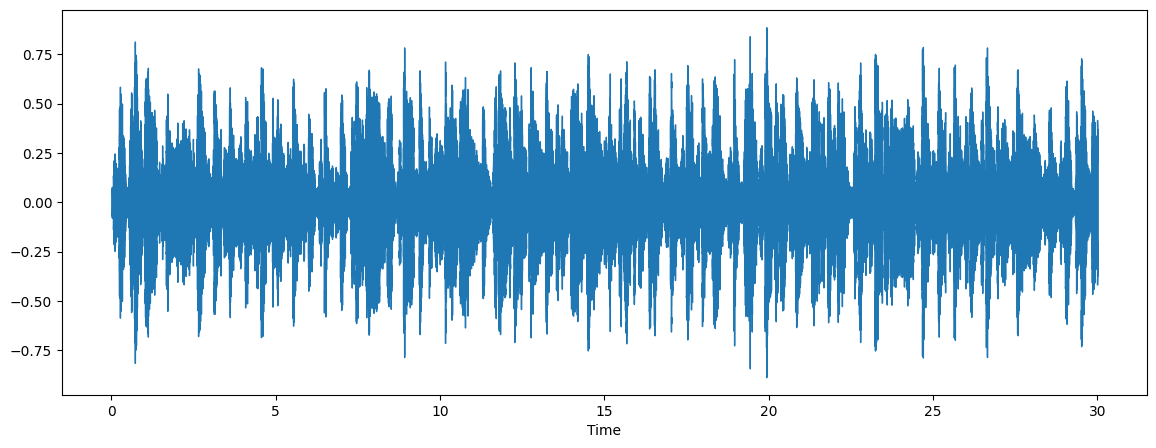

In [1]:
import os
import librosa
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
random_file_name = "./blues.00000.wav"
y, sr = librosa.load(random_file_name, sr = 44100)
plt.figure(figsize=(14,5))
librosa.display.waveshow(y,sr=sr)
from IPython.display import Audio
Audio(data=y, rate=sr)

# Doing Visualization on Chunks of Audio

In [2]:
audio_path = "./blues.00000.wav"

	•	Overlapping: Ensures continuity between chunks, which is particularly important in tasks like audio classification, where edge effects could lead to a loss of relevant information.
	•	Chunking: Helps in breaking down the signal into manageable pieces, making it easier to analyze and process the data.

#Explanation of `num_chunks` Formula

The formula calculates the number of overlapping chunks in an audio signal:

- **`len(y)`**: Total samples in the audio signal.
- **`chunk_samples`**: Samples in each chunk.
- **`overlap_samples`**: Samples that overlap between consecutive chunks.
- **`chunk_samples - overlap_samples`**: Effective new samples introduced by each chunk.
- **Formula**: 
  - `(len(y) - chunk_samples) / (chunk_samples - overlap_samples)`: Calculates additional chunks that fit into the remaining samples.
  - `np.ceil()`: Rounds up to ensure full chunks.
  - `+1`: Includes the first chunk.
    

In [3]:
y,sr = librosa.load(audio_path, sr = None) # sr = None => to keep original sampling rate

#define the duration of each chunks and overlap
chunk_duration = 4
overlap_duration = 2
#chunk1 will be 0 to 4 sec, and chunk2 will be 2 to 6 sec
#we do overlap to maintain the information of previous chunk as well


#convert duration to sample
chunk_samples = chunk_duration * sr
overlap_samples = overlap_duration * sr

#Calculate the  number of chunks
num_chunks = int(np.ceil((len(y) - chunk_samples)/(chunk_samples-overlap_samples))) + 1


### Iterating Over Each Chunk of Audio

- **`for i in range(num_chunks):`**: Loops through each chunk from 0 to `num_chunks - 1`.
  
- **Calculate Start and End Indices**:
  - **`start = i * (chunk_samples - overlap_samples)`**: 
    - Computes the starting index for each chunk.
    - Moves forward by the effective chunk length (`chunk_samples - overlap_samples`), ensuring that each chunk starts where the previous chunk ends minus the overlap.
  - **`end = start + chunk_samples`**: 
    - Determines the ending index of the chunk by adding `chunk_samples` to the start index.

- **Extract the Chunk Audio**:
  - **`chunk = y[start:end]`**: 
    - Extracts the chunk of audio using the calculated start and end indices.

- **Visualize the Chunk**:
  - **`plt.figure(figsize = (4, 2))`**: 
    - Creates a new figure for each chunk with a specified size.
  - **`librosa.display.waveshow(chunk, sr = sr)`**: 
    - Displays the waveform of the chunk using `librosa`.
  - **`plt.show()`**: 
    - Shows the plot for each chunk, allowing you to visualize the audio chunks one by one.

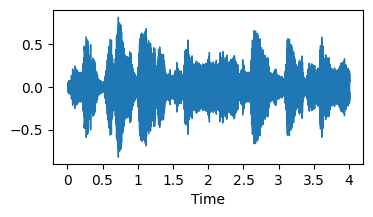

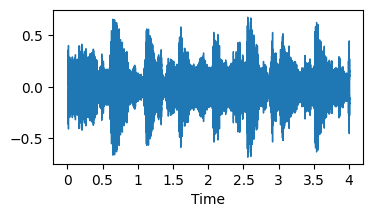

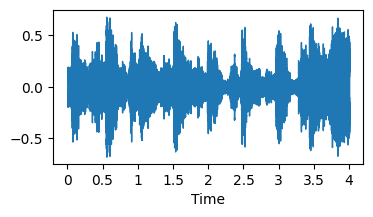

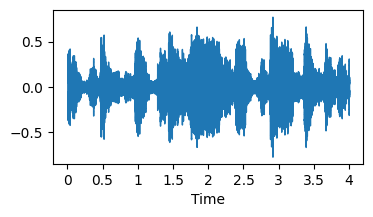

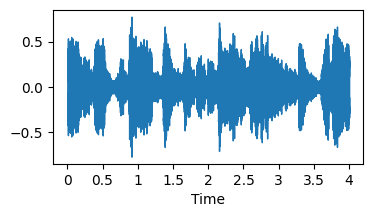

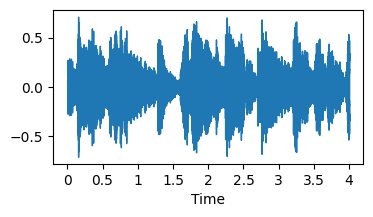

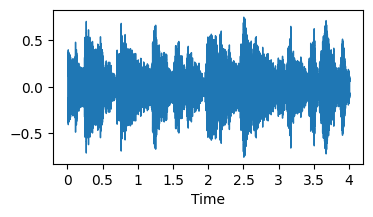

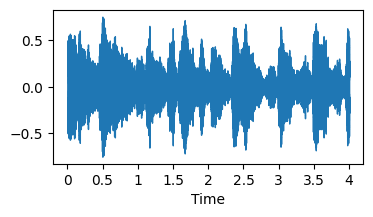

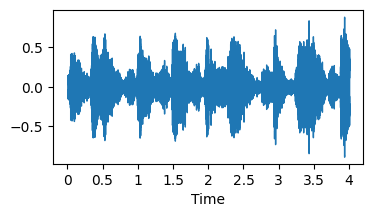

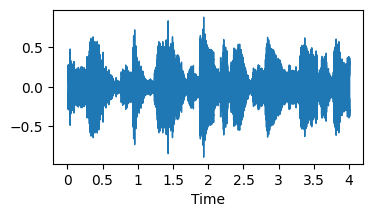

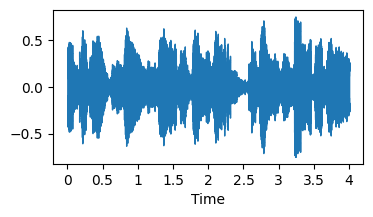

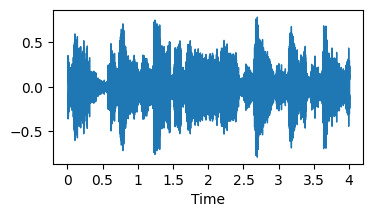

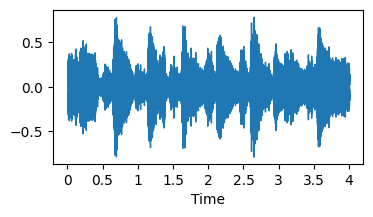

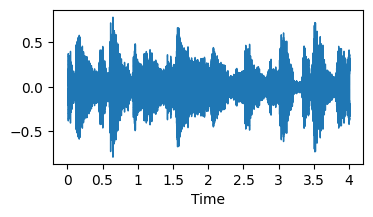

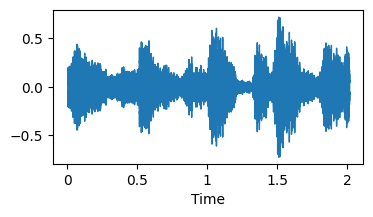

In [4]:
#iterate over each chunks
for i in range(num_chunks):
    #calculate start and end indices of the chunks
    start = i * (chunk_samples - overlap_samples)
    end = start + chunk_samples
    #Extract the chunk audio
    chunk = y[start:end]
    plt.figure(figsize = (4,2))
    librosa.display.waveshow(chunk, sr = sr)
    plt.show()


# Melspectrogram Visualization

In [5]:
#Plotting Melspectrogram of Entire Audio

In [6]:
def plot_melspectrogram(y,sr):
    # Compute Spectrogram
    spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
    # Convert to decibels (log scales)
    spectrogram_db = librosa.power_to_db(spectrogram, ref = np.max)
    # Visualize the spectrogram
    plt.figure(figsize = (10,4))
    librosa.display.specshow(spectrogram_db, sr = sr, x_axis = 'time', y_axis = 'mel')
    plt.colorbar(format = '%2.0f db')
    plt.title("Spectrogram")
    plt.tight_layout()
    plt.show()

### Mel Spectrogram Visualization

- **Mel Spectrogram**: Converts the audio into a visual representation of frequencies over time using the Mel scale.
- **Decibels (dB)**: `librosa.power_to_db` converts the power spectrogram into a decibel scale for better visualization.
- **Visualization**: Uses `librosa.display.specshow` to plot the spectrogram with time on the x-axis and frequency (Mel scale) on the y-axis.
- **Colorbar**: Displays intensity in decibels (dB) with formatted labels.
- **Layout**: `plt.tight_layout()` ensures the plot elements are neatly arranged.

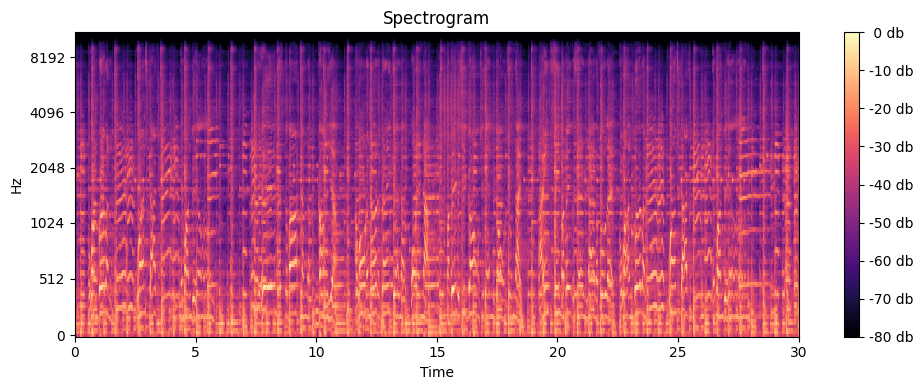

In [7]:
plot_melspectrogram(y,sr)

### Doing same thing with chunks

In [8]:
def plot_melspectrogram_chunks(y,sr) :
    #define the duration of each chunks and overlap
    chunk_duration = 4
    overlap_duration = 2
    #chunk1 will be 0 to 4 sec, and chunk2 will be 2 to 6 sec
    #we do overlap to maintain the information of previous chunk as well
    
    
    #convert duration to sample
    chunk_samples = chunk_duration * sr
    overlap_samples = overlap_duration * sr
    
    #Calculate the  number of chunks
    num_chunks = int(np.ceil((len(y) - chunk_samples)/(chunk_samples-overlap_samples))) + 1

    for i in range(num_chunks):
        #calculate start and end indices of the chunks
        start = i * (chunk_samples - overlap_samples)
        end = start + chunk_samples
    #Extract the chunk audio
        chunk = y[start:end]
        plot_melspectrogram(chunk, sr)
    

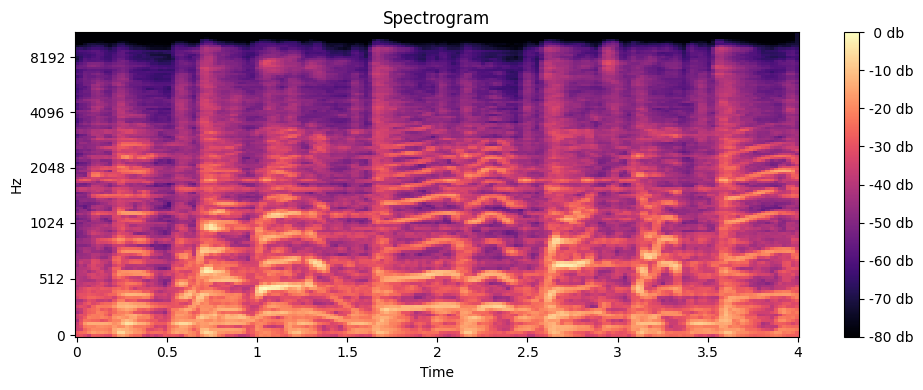

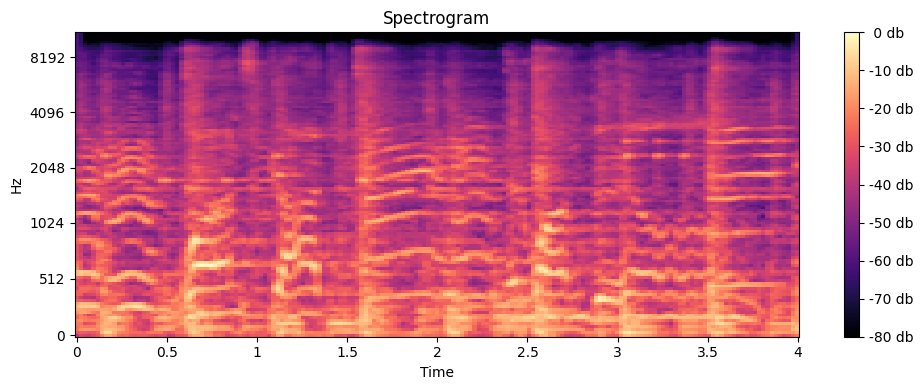

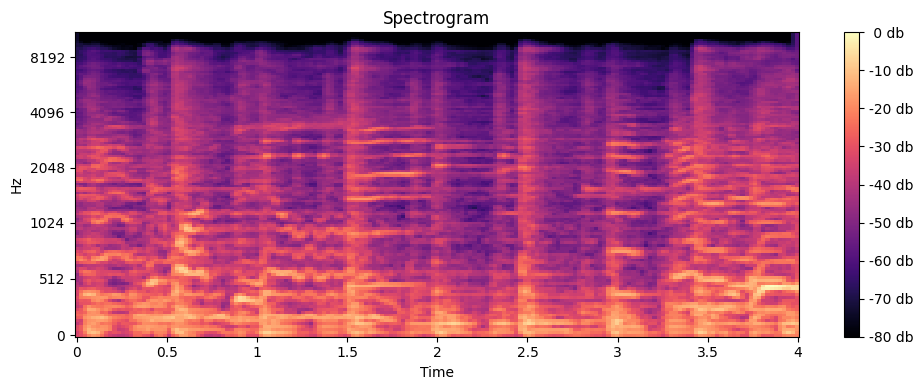

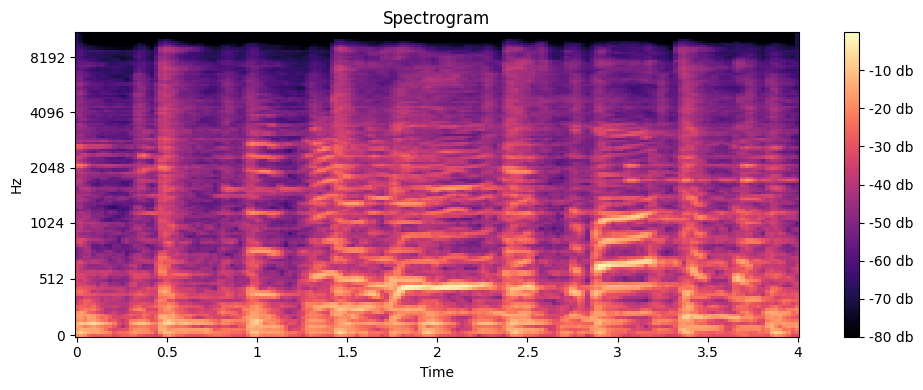

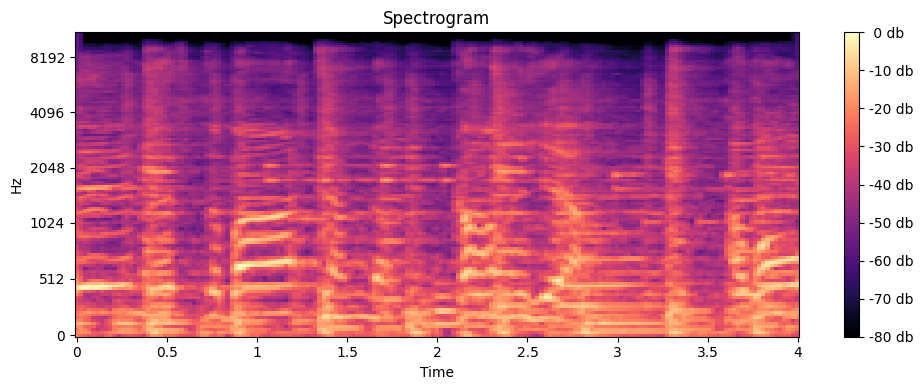

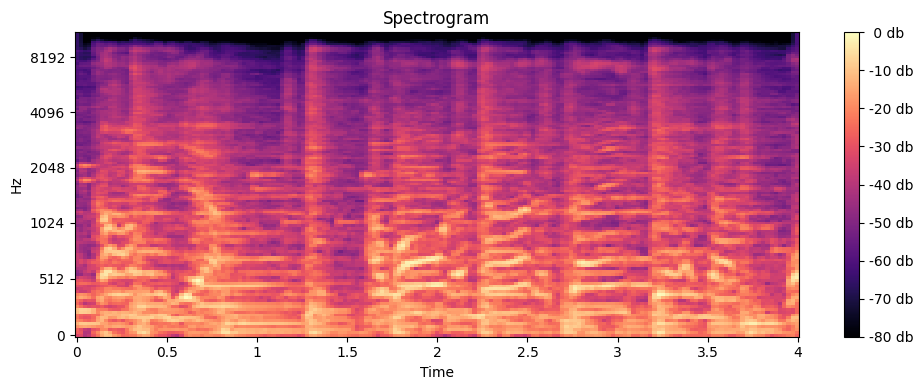

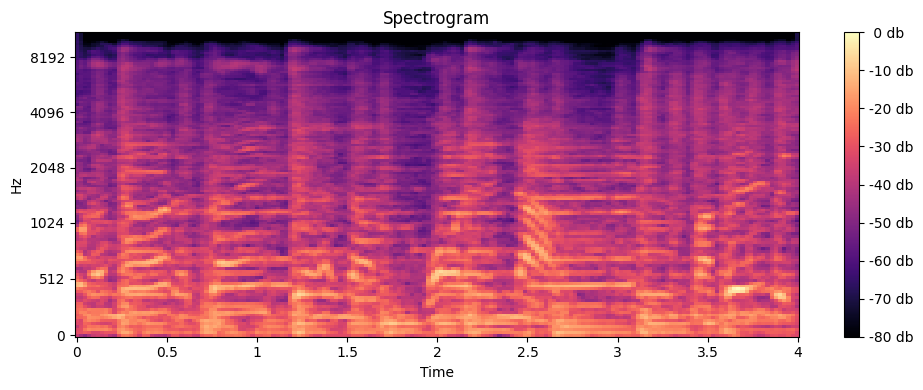

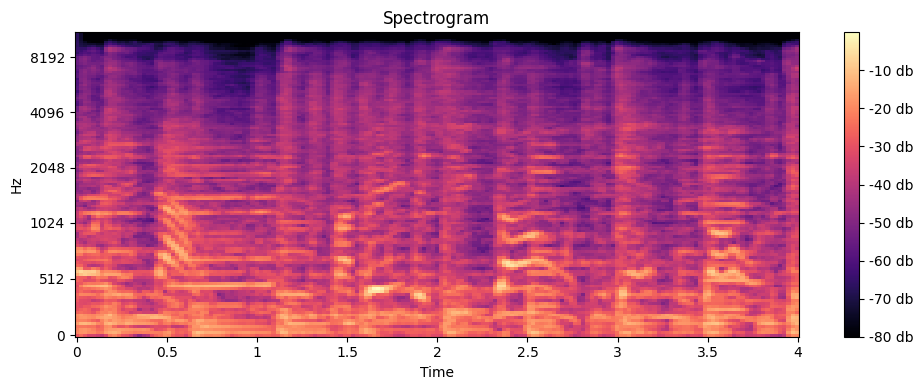

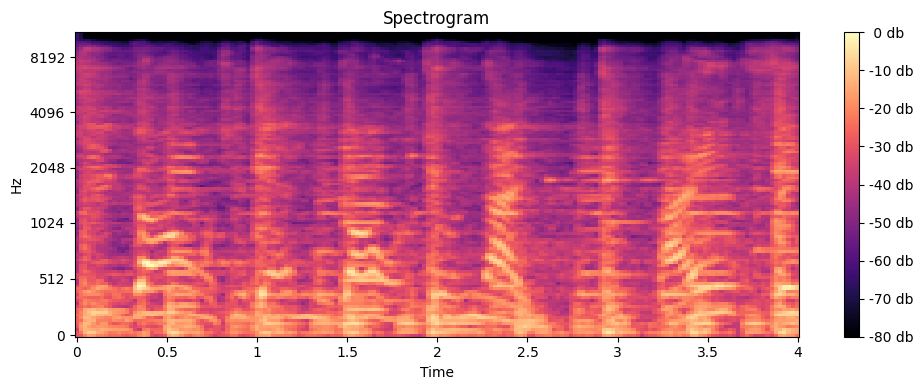

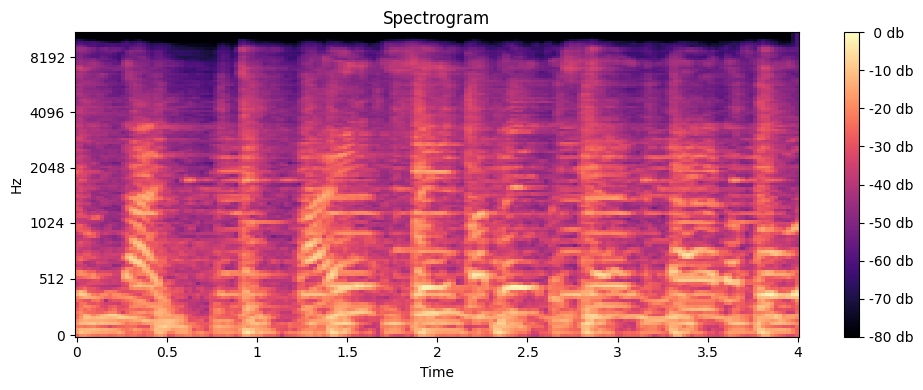

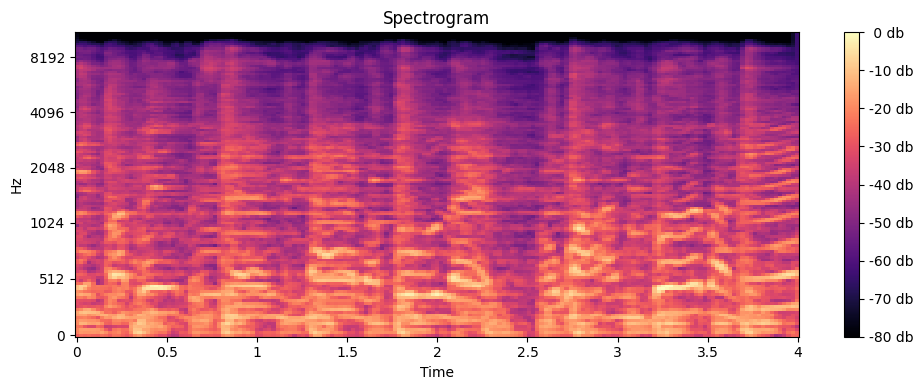

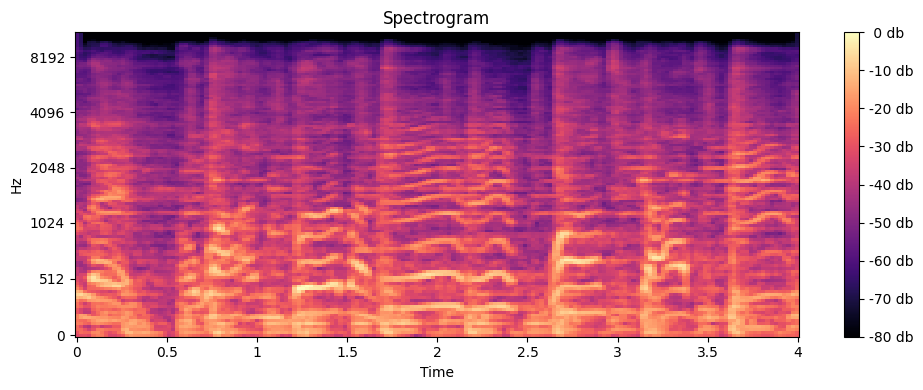

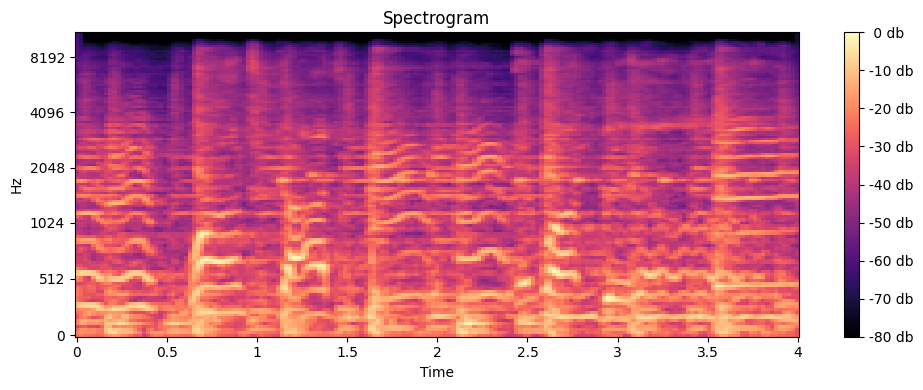

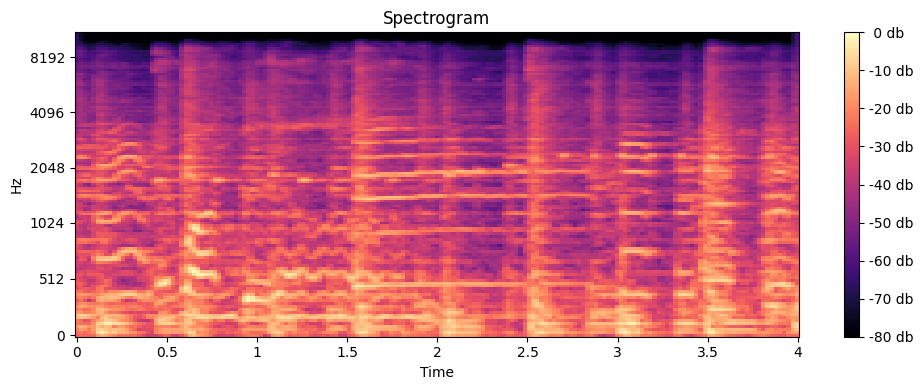

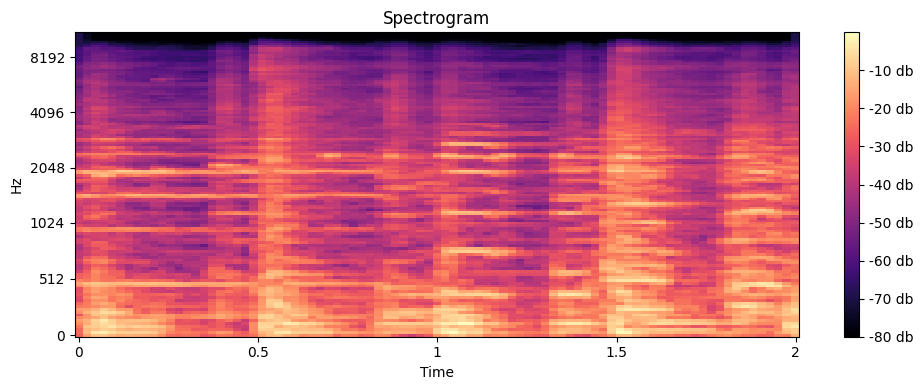

In [9]:
plot_melspectrogram_chunks(y,sr)

### Plotting Mel Spectrogram for Audio Chunks

- **Chunking**: The audio is divided into overlapping chunks to retain information between consecutive segments.
  - **Chunk Duration**: Each chunk lasts for 4 seconds.
  - **Overlap Duration**: Consecutive chunks overlap by 2 seconds.
  
- **Sample Conversion**: Convert chunk and overlap duration from time to samples based on the sampling rate.

- **Number of Chunks**: Calculate how many overlapping chunks can be extracted from the audio signal.

- **Iterate Through Chunks**:
  - **Start/End Indices**: Compute the start and end sample indices for each chunk.
  - **Extract Chunk**: Slice the audio signal to extract the chunk.
  - **Plot Mel Spectrogram**: Visualize the Mel spectrogram for each audio chunk using the `plot_melspectrogram` function.

# Data Preprocessing - Final

In [10]:
# defining my directory
data_dir = "./genres_original"
classes = ['blues', 'classical', 'country', 'disco', 'hiphop', 'metal', 'pop', 'reggae', 'rock']

In [11]:
from tensorflow.image import resize 


# Load and preprocess audio data
def load_and_preprocess_data(data_dir, classes, target_shape=(210, 210)):
    data = []
    labels = []

    for i_class, class_name in enumerate(classes):
        class_dir = os.path.join(data_dir, class_name)  # Get directory for each class
        print("Processing--", class_name)
        for filename in os.listdir(class_dir):
            if filename.endswith('.wav'):  # Process only .wav files
                file_path = os.path.join(class_dir, filename)  # Full path to the file
                audio_data, sample_rate = librosa.load(file_path, sr=None)  # Load audio, keep original sample rate, thats why 'None'
                
                # Define chunk and overlap durations
                chunk_duration = 4  # 4 seconds per chunk
                overlap_duration = 2  # 2 seconds overlap
                
                # Convert duration from seconds to samples
                chunk_samples = chunk_duration * sample_rate
                overlap_samples = overlap_duration * sample_rate
                
                # Calculate number of chunks in the audio
                num_chunks = int(np.ceil((len(audio_data) - chunk_samples) / (chunk_samples - overlap_samples))) + 1
            
                for i in range(num_chunks):
                    # Calculate start and end indices for each chunk
                    start = i * (chunk_samples - overlap_samples)
                    end = start + chunk_samples
                    # Extract the chunk of audio
                    chunk = audio_data[start:end]
                    
                    # Compute Mel spectrogram for the chunk
                    spectrogram = librosa.feature.melspectrogram(y=chunk, sr=sample_rate)

                    #resize matrix to target shape
                    mel_spectrogram = resize(np.expand_dims(spectrogram, axis = -1), target_shape)

                    #Append data to list
                    data.append(mel_spectrogram)
                    labels.append(i_class)

    return np.array(data), np.array(labels)  #converting them to numpy array and returning it

In [12]:
data, labels = load_and_preprocess_data(data_dir, classes)

Processing-- blues
Processing-- classical
Processing-- country
Processing-- disco
Processing-- hiphop
Processing-- metal
Processing-- pop
Processing-- reggae
Processing-- rock


### Audio Data Preprocessing and Mel Spectrogram Extraction

- **Function Purpose**: This function processes audio data by splitting it into chunks, computing Mel spectrograms for each chunk, and resizing them to a uniform shape for neural network input.

1. **Loading Audio**: Audio files are loaded using `librosa.load`, keeping the original sample rate (`sr=None`).
2. **Chunking Audio**: Each audio file is split into overlapping chunks (4-second chunks with 2-second overlap) to retain continuity.
3. **Mel Spectrogram**: For each chunk, a Mel spectrogram is computed using `librosa.feature.melspectrogram`.
4. **Resizing**: The spectrogram is resized to a fixed shape (e.g., 210x210 pixels) using TensorFlow’s `resize` function.
5. **Appending Data**: The processed spectrograms and their corresponding labels (genre classes) are appended to lists and later converted to NumPy arrays for model training.

This preprocessing step ensures that all audio data is converted into a standardized format suitable for neural network training.

In [13]:
data.shape

(13490, 210, 210, 1)

- **Data shape**: `(13490, 210, 210, 1)`
  - 13490 samples, each of size 210x210 (Mel spectrogram), 1 channel (grayscale)


In [14]:
from tensorflow.keras.utils import to_categorical
labels = to_categorical(labels, num_classes = len(classes)) #Converting labels to one-hot encoding
labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

### Output Explanation

The data contains 13,490 samples, each represented as a 210x210 Mel spectrogram with a single grayscale channel.

The labels are converted to one-hot encoding using `to_categorical()`. Each label is now represented as a binary vector corresponding to the number of genre classes. For example:
- `[1, 0, 0, ..., 0]` represents the first genre.
- `[0, 1, 0, ..., 0]` represents the second genre, and so on.

This one-hot encoding ensures that the labels are ready for neural network training.

In [15]:
!pip install scikit-learn

# Splitting of Dataset into Training and Test set

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data, labels, test_size = 0.2, random_state = 42)

### Splitting Dataset into Training and Test Sets

We used the `train_test_split` function from `sklearn.model_selection` to divide the data into training and test sets. The data is split as follows:
- **80% training** (`X_train`, `Y_train`) and **20% testing** (`X_test`, `Y_test`) using `test_size=0.2`.
- **`random_state=42`** ensures reproducibility for consistent results across runs.

The dataset consists of 13,490 samples, each being a 210x210 grayscale Mel spectrogram, with corresponding one-hot encoded labels for 9 genre classes.

# Building Model 

### 1. Importing Necessary Layers and Optimizer

In [17]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers.legacy import Adam

	•	Conv2D: Applies convolutional filters to extract features from the input (e.g., edges, textures).
	•	MaxPool2D: Reduces the spatial dimensions, preventing overfitting by retaining only key information.
	•	Flatten: Converts 2D feature maps into a 1D vector before feeding into Dense layers.
	•	Dense: Fully connected layers for classification.
	•	Dropout: Prevents overfitting by randomly dropping neurons during training.
	•	Adam Optimizer: Adaptive learning optimizer for faster convergence. The legacy import is used for compatibility reasons.

### 2. Creating a Sequential Model

In [18]:
model = tf.keras.models.Sequential()
X_train[0].shape

(210, 210, 1)

	•	Sequential Model: Builds the model layer by layer in a sequence.
	•	X_train[0].shape: Displays the shape of the input data, which should be (210, 210, 1) (grayscale images).

### 3. Adding Convolutional and Pooling Layers

In [19]:
model.add(Conv2D(filters = 32, kernel_size=3, padding = 'same', activation = 'relu', input_shape = X_train[0].shape))
model.add(Conv2D(filters = 32, kernel_size=3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = 2, strides = 2))

	•	Conv2D (filters = 32): First convolution layer with 32 filters, kernel_size=3x3 to detect small features.
	•	Padding=‘same’: Maintains the same spatial dimensions after convolution.
	•	Activation=‘relu’: Introduces non-linearity for better learning.
	•	Input_shape: Defined in the first layer based on the training data (210x210x1).
	•	MaxPool2D: Reduces the dimensionality (2x2 pooling window) with stride 2 for downsampling.

### 4. Stacking Convolutional Layers with Increased Filters

In [20]:
model.add(Conv2D(filters = 64, kernel_size=3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size=3, activation = 'relu'))
model.add(MaxPool2D(pool_size = 2, strides = 2))

	•	Conv2D (filters = 64): Doubles the number of filters to capture more complex patterns.
	•	Same parameters for kernel size, padding, and activation as before.
	•	MaxPool2D: Again, reduces the spatial dimensions by half.

### 5. Adding Deeper Convolution Layers

In [21]:
model.add(Conv2D(filters = 128, kernel_size=3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size=3, activation = 'relu'))
model.add(MaxPool2D(pool_size = 2, strides = 2))

	•	Conv2D (filters = 128): Further increases the filter count to capture even more complex features.
	•	Same pooling and activation function as in previous layers.

### 6. Adding Dropout Layer to Avoid Overfitting

In [22]:
model.add(Dropout(0.3))

	•	Dropout (0.3): Drops 30% of neurons randomly during training to prevent overfitting and improve generalization.

### 7. Adding Higher Level Filters

In [23]:
model.add(Conv2D(filters = 256, kernel_size=3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 256, kernel_size=3, activation = 'relu'))
model.add(MaxPool2D(pool_size = 2, strides = 2))

	•	Conv2D (filters = 256): As the network deepens, more filters are added to extract high-level features.

### 8. Further Increasing Filter Depth

In [24]:
model.add(Conv2D(filters = 512, kernel_size=3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 512, kernel_size=3, activation = 'relu'))
model.add(MaxPool2D(pool_size = 2, strides = 2))

	•	Conv2D (filters = 512): The largest number of filters in the network for capturing the most abstract patterns.

### 9. Adding Dropout Layer Again

In [25]:
model.add(Dropout(0.3))

	•	Dropout (0.3): Another dropout layer to prevent overfitting in the deeper layers of the model.

### 10. Flattening Layer

In [26]:
model.add(Flatten())

	•	Flatten: Converts the 2D feature maps into a 1D vector for the fully connected layers.


### 11. Fully Connected Layer

In [27]:
model.add(Dense(units = 1200, activation = 'relu'))

	•	Dense (1200 units): A large fully connected layer with 1200 neurons to process the flattened data.
	•	ReLU Activation: For faster convergence in the deep layers.


### 12. Adding Dropout Layer for Overfitting Prevention

In [28]:
model.add(Dropout(0.45))

	•	Dropout (0.45): Drops 45% of the neurons to prevent overfitting, especially in deeper layers where overfitting is more likely due to a large number of parameters.

### 13. Output Layer for Classification

In [29]:
model.add(Dense(units = len(classes), activation = 'Softmax'))

	•	Dense (units = len(classes)): The number of units corresponds to the number of classes (e.g., 10 genres). This layer produces the final classification output.
	•	Softmax Activation: Used for multi-class classification to produce probabilities for each class.

### 14. Model Summary

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 210, 210, 32)      320       
                                                                 
 conv2d_1 (Conv2D)           (None, 210, 210, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 105, 105, 32)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 105, 105, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 103, 103, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 51, 51, 64)        0         
 g2D)                                                   

### Model Summary Explanation

1. **Output Shape**:
   - Convolution layers maintain the input dimensions with **padding='same'**, e.g., `(210, 210, 32)`.
   - Pooling layers reduce dimensions by half, e.g., from `(210, 210, 32)` to `(105, 105, 32)`.

2. **Parameters**:
   - The first `Conv2D` layer has 320 parameters, calculated based on the filter size, kernel size, and input channels.
   - Total parameters in the model: **55.52 million**, indicating a large, complex model.

3. **Padding and Pooling**:
   - **Padding='same'** keeps the spatial size after convolution.
   - **MaxPooling** reduces the spatial dimensions to focus on key features, lowering computational cost.

### Compile the model

In [31]:
model.compile(optimizer = Adam(learning_rate = 0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

### Training Model

In [32]:
training_history = model.fit(X_train, Y_train, epochs = 30, batch_size = 32, validation_data = (X_test, Y_test))

Epoch 1/30
338/338 [==============================] - 849s 3s/step - loss: 1.7885 - accuracy: 0.3482 - val_loss: 1.3357 - val_accuracy: 0.5348
Epoch 2/30
338/338 [==============================] - 904s 3s/step - loss: 1.2406 - accuracy: 0.5651 - val_loss: 1.0532 - val_accuracy: 0.6238
Epoch 3/30
338/338 [==============================] - 858s 3s/step - loss: 0.9733 - accuracy: 0.6606 - val_loss: 0.8398 - val_accuracy: 0.7116
Epoch 4/30
338/338 [==============================] - 836s 2s/step - loss: 0.7973 - accuracy: 0.7237 - val_loss: 0.7307 - val_accuracy: 0.7509
Epoch 5/30
338/338 [==============================] - 746s 2s/step - loss: 0.6614 - accuracy: 0.7739 - val_loss: 0.6207 - val_accuracy: 0.7884
Epoch 6/30
338/338 [==============================] - 800s 2s/step - loss: 0.5480 - accuracy: 0.8138 - val_loss: 0.5882 - val_accuracy: 0.8024
Epoch 7/30
338/338 [==============================] - 723s 2s/step - loss: 0.4638 - accuracy: 0.8425 - val_loss: 0.4565 - val_accuracy: 0.8477

### Reason for `model.fit()` Parameters

- **`epochs = 30`**: Trains the model for 30 complete passes over the entire dataset. This allows the model to learn and adjust weights iteratively, ensuring sufficient learning without overfitting.
  
- **`batch_size = 32`**: Processes 32 samples at a time before updating the model weights. This balances training speed and memory usage.
  
- **`validation_data = (X_test, Y_test)`**: Uses a separate validation set to evaluate model performance after each epoch. This helps in monitoring the model's ability to generalize and avoids overfitting by tracking validation loss and accuracy.

### Saving The Model

In [40]:
model.save("Trained_model.h5")

/opt/anaconda3/envs/tensorflow_env/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [34]:
training_history.history

{'loss': [1.788513422012329,
  1.2405786514282227,
  0.9732601046562195,
  0.7973440289497375,
  0.6613836288452148,
  0.5480437874794006,
  0.4637562036514282,
  0.3838850259780884,
  0.3222079575061798,
  0.2772546112537384,
  0.21761128306388855,
  0.20819874107837677,
  0.15776386857032776,
  0.1451719105243683,
  0.11408315598964691,
  0.11561916768550873,
  0.09493944048881531,
  0.08442873507738113,
  0.08225682377815247,
  0.06859222054481506,
  0.07431907206773758,
  0.06422001123428345,
  0.05814360827207565,
  0.054406337440013885,
  0.058654602617025375,
  0.04032354801893234,
  0.046090614050626755,
  0.05878468230366707,
  0.05384337529540062,
  0.03773951157927513],
 'accuracy': [0.34822091460227966,
  0.5651408433914185,
  0.6605818867683411,
  0.7236841917037964,
  0.7739065885543823,
  0.8137509226799011,
  0.8424758911132812,
  0.8686990141868591,
  0.8904744386672974,
  0.904280960559845,
  0.9243884086608887,
  0.9270756244659424,
  0.9499629139900208,
  0.94977760

In [35]:
import json
with open('training_hist.json','w') as f:
    json.dump(training_history.history,f)

### Reason for Saving Training History

- **`training_history.history`**: This contains the training metrics (e.g., loss, accuracy) for each epoch, including both training and validation performance.

- **`json.dump()`**: Saves the training history as a JSON file. This allows you to:
  - Reuse the training data later without retraining the model.
  - Analyze the model's performance metrics (e.g., plotting accuracy/loss graphs) after training is complete.
  - Avoid losing training information in case the session is interrupted or when switching between notebooks.

### Reloading model variable

In [41]:
model = tf.keras.models.load_model("Trained_model.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 210, 210, 32)      320       
                                                                 
 conv2d_1 (Conv2D)           (None, 210, 210, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 105, 105, 32)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 105, 105, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 103, 103, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 51, 51, 64)        0         
 g2D)                                                   

### Reloading the model

In [49]:
import json
with open('training_hist.json','r') as json_file:
    training_history_data = json.load(json_file)

In [43]:
training_history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Model evaluation 

In [44]:
#Model evaluation on training set
train_loss, train_accuracy = model.evaluate(X_train, Y_train)

338/338 [==============================] - 177s 517ms/step - loss: 0.0104 - accuracy: 0.9966


In [45]:
# Model Evaluation on Validation Set
val_loss, val_accuracy = model.evaluate(X_test, Y_test)

85/85 [==============================] - 39s 462ms/step - loss: 0.2878 - accuracy: 0.9303


In [46]:
train_loss, train_accuracy, val_loss, val_accuracy

(0.010366134345531464,
 0.9965715408325195,
 0.2878343462944031,
 0.9303187727928162)

### Results:
	•	Training Loss: 0.0104
	•	Training Accuracy: 99.66%
    •	Validation Loss: 0.2878
	•	Validation Accuracy: 93.03%

### Interpretation:

	•	The training accuracy is very high (99.66%), which indicates that the model has learned the training data very well.
	•	The validation accuracy is lower at 93.03%, which shows some generalization but also indicates that the model might be slightly overfitting to the training data.

# Accuracy and loss Vsiualisation

### Visualisation of loss

In [48]:
epochs = [i for i in range(1,31)]

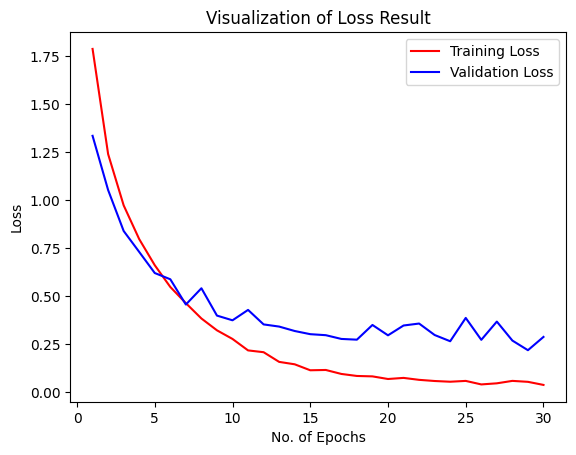

In [53]:
plt.plot(epochs, training_history_data['loss'], label = "Training Loss", color = 'red')
plt.plot(epochs, training_history_data['val_loss'], label = "Validation Loss", color = 'blue')
plt.xlabel("No. of Epochs")
plt.ylabel("Loss")
plt.title("Visualization of Loss Result")
plt.legend()
plt.show()

### Loss Graph Analysis:
- **Training Loss** consistently decreases as the model learns, reaching near zero.
- **Validation Loss** decreases initially but fluctuates slightly after epoch 10, indicating the model may be slightly overfitting.
- The gap between training and validation loss suggests that while the model performs well, further tuning may be needed to reduce overfitting.

### Visualisation of Accuracy

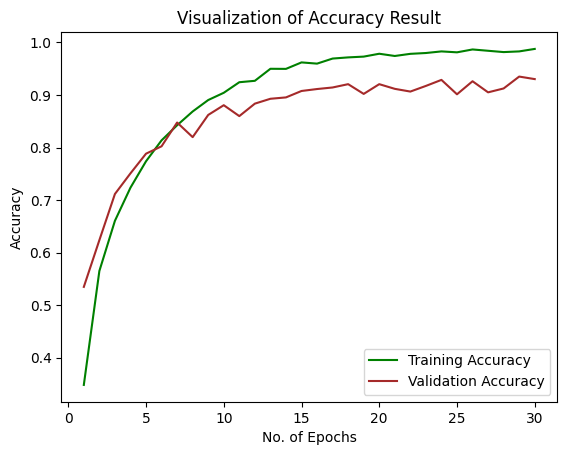

In [56]:
plt.plot(epochs, training_history_data['accuracy'], label = "Training Accuracy", color = 'green')
plt.plot(epochs, training_history_data['val_accuracy'], label = "Validation Accuracy", color = 'brown')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

### Accuracy Graph Analysis:
- **Training Accuracy** steadily improves and converges close to 1, indicating the model is learning well on the training data.
- **Validation Accuracy** follows a similar trend but plateaus around 93%, which shows good generalization with some overfitting after epoch 20.